<a href="https://colab.research.google.com/github/chaitanya-sharma/water_potability_prediction/blob/main/keransnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import  matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline
import pandas as pd
import scipy as sp

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import random
from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_csv("water_potability.csv")

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
mean_trihalomethanes = df['Trihalomethanes'].mean()
mean_sulfate = df['Sulfate'].mean()
mean_pH=df['ph'].mean()

In [ ]:
def proc_data(df):
    df['ph'].fillna(mean_pH, inplace=True)
    df['Trihalomethanes'].fillna(mean_trihalomethanes, inplace=True)
    df['Sulfate'].fillna(mean_sulfate, inplace=True)

In [ ]:
proc_data(df)

In [ ]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

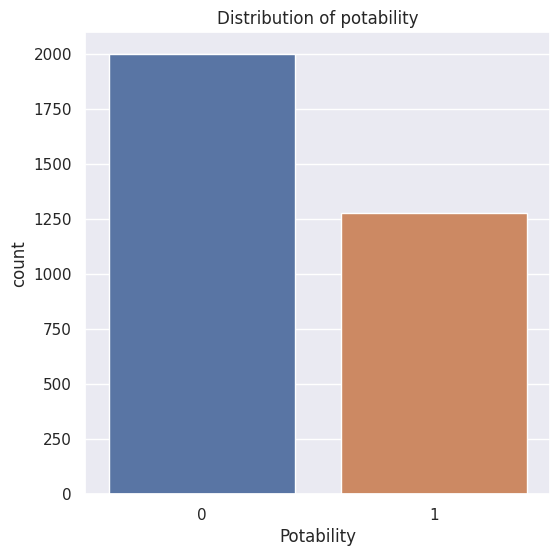

In [ ]:
plt.figure(figsize=(6,6))
sns.set_theme(style="darkgrid")
sns.countplot(x = df['Potability'])
plt.title('Distribution of potability')
plt.show()

In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


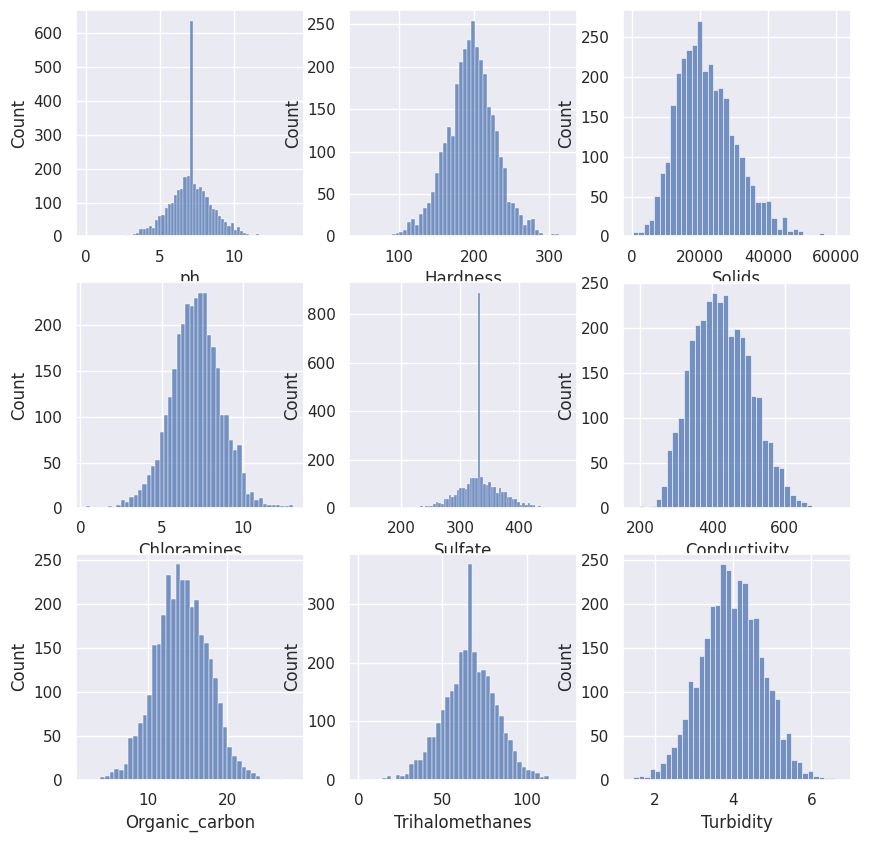

In [ ]:
plt.figure(figsize=(10,10))
for i,j in zip(df.columns[:-1], range(len(df.columns)-1)):
    plt.subplot(3,3,j+1)
    sns.histplot(data = df[i])
plt.show()

In [ ]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075833,-0.081884,-0.031811,0.014403,0.017192,0.040061,0.002994,-0.036222,-0.003287
Hardness,0.075833,1.000000,-0.046899,-0.030054,-0.092766,-0.023915,0.003610,-0.012690,-0.014449,-0.013837
Solids,-0.081884,-0.046899,1.000000,-0.070148,-0.149840,0.013831,0.010242,-0.008875,0.019546,0.033743
Chloramines,-0.031811,-0.030054,-0.070148,1.000000,0.023791,-0.020486,-0.012653,0.016627,0.002363,0.023779
Sulfate,0.014403,-0.092766,-0.149840,0.023791,1.000000,-0.014059,0.026909,-0.025605,-0.009790,-0.020619
Conductivity,0.017192,-0.023915,0.013831,-0.020486,-0.014059,1.000000,0.020966,0.001255,0.005798,-0.008128
Organic_carbon,0.040061,0.003610,0.010242,-0.012653,0.026909,0.020966,1.000000,-0.012976,-0.027308,-0.030001
Trihalomethanes,0.002994,-0.012690,-0.008875,0.016627,-0.025605,0.001255,-0.012976,1.000000,-0.021502,0.006960
Turbidity,-0.036222,-0.014449,0.019546,0.002363,-0.009790,0.005798,-0.027308,-0.021502,1.000000,0.001581
Potability,-0.003287,-0.013837,0.033743,0.023779,-0.020619,-0.008128,-0.030001,0.006960,0.001581,1.000000


In [ ]:
Y = df['Potability']
X = df.drop(columns=['Potability'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
import tensorflow as tf

In [ ]:
tf.random.set_seed(0)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(48, activation='relu'),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

history = model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
72/72 [==============================] - 3s 7ms/step - loss: 0.6748 - accuracy: 0.6079 - precision: 0.4659 - recall: 0.1477
Epoch 2/100
72/72 [==============================] - 0s 5ms/step - loss: 0.6345 - accuracy: 0.6489 - precision: 0.6133 - recall: 0.2307
Epoch 3/100
72/72 [==============================] - 0s 7ms/step - loss: 0.6272 - accuracy: 0.6642 - precision: 0.6403 - recall: 0.2852
Epoch 4/100
72/72 [==============================] - 0s 5ms/step - loss: 0.6146 - accuracy: 0.6738 - precision: 0.6404 - recall: 0.3420
Epoch 5/100
72/72 [==============================] - 0s 4ms/step - loss: 0.6230 - accuracy: 0.6620 - precision: 0.6343 - recall: 0.2818
Epoch 6/100
72/72 [==============================] - 0s 3ms/step - loss: 0.6043 - accuracy: 0.6834 - precision: 0.6645 - recall: 0.3534
Epoch 7/100
72/72 [==============================] - 0s 2ms/step - loss: 0.5969 - accuracy: 0.6882 - precision: 0.6879 - recall: 0.3432
Epoch 8/100
72/72 [=============================

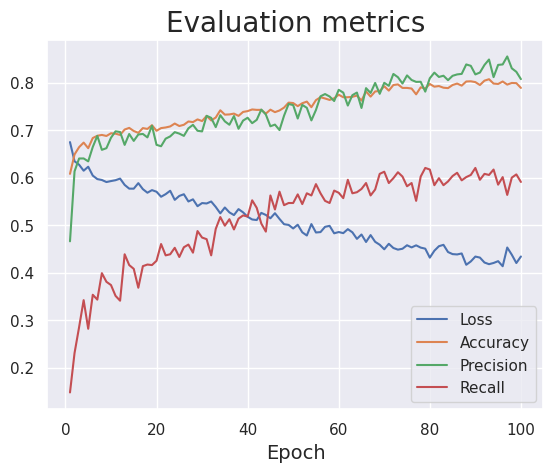

In [ ]:
plt.plot(
    np.arange(1, 101),
    history.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, 101),
    history.history['accuracy'], label='Accuracy'
)
plt.plot(
    np.arange(1, 101),
    history.history['precision'], label='Precision'
)
plt.plot(
    np.arange(1, 101),
    history.history['recall'], label='Recall'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();